In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [4]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100  
plt.rcParams['savefig.dpi'] = 300  


In [5]:
def load_and_examine_data():
    """Load the three CSV files and provide initial data overview"""
    
    # Load the datasets
    simple_df = pd.read_csv('./data/spiegel_rag_denazification_temporal-full-50-20_simple.csv')
    gpt_df = pd.read_csv('./data/spiegel_rag_denazification_temporal-full-50-20_gpt.csv')
    gemini_df = pd.read_csv('./data/spiegel_rag_denazification_temporal-full-50-20_gemini.csv')
    
    # Add method identifier
    simple_df['method'] = 'Simple Vector'
    gpt_df['method'] = 'GPT-4o Agentic'
    gemini_df['method'] = 'Gemini 2.5 Agentic'
    
    print("📊 Dataset Overview:")
    print(f"Simple Vector Retrieval: {len(simple_df)} chunks")
    print(f"GPT-4o Agentic: {len(gpt_df)} chunks") 
    print(f"Gemini 2.5 Agentic: {len(gemini_df)} chunks")
    print()
    
    return simple_df, gpt_df, gemini_df

simple_df, gpt_df, gemini_df = load_and_examine_data()


📊 Dataset Overview:
Simple Vector Retrieval: 140 chunks
GPT-4o Agentic: 140 chunks
Gemini 2.5 Agentic: 140 chunks



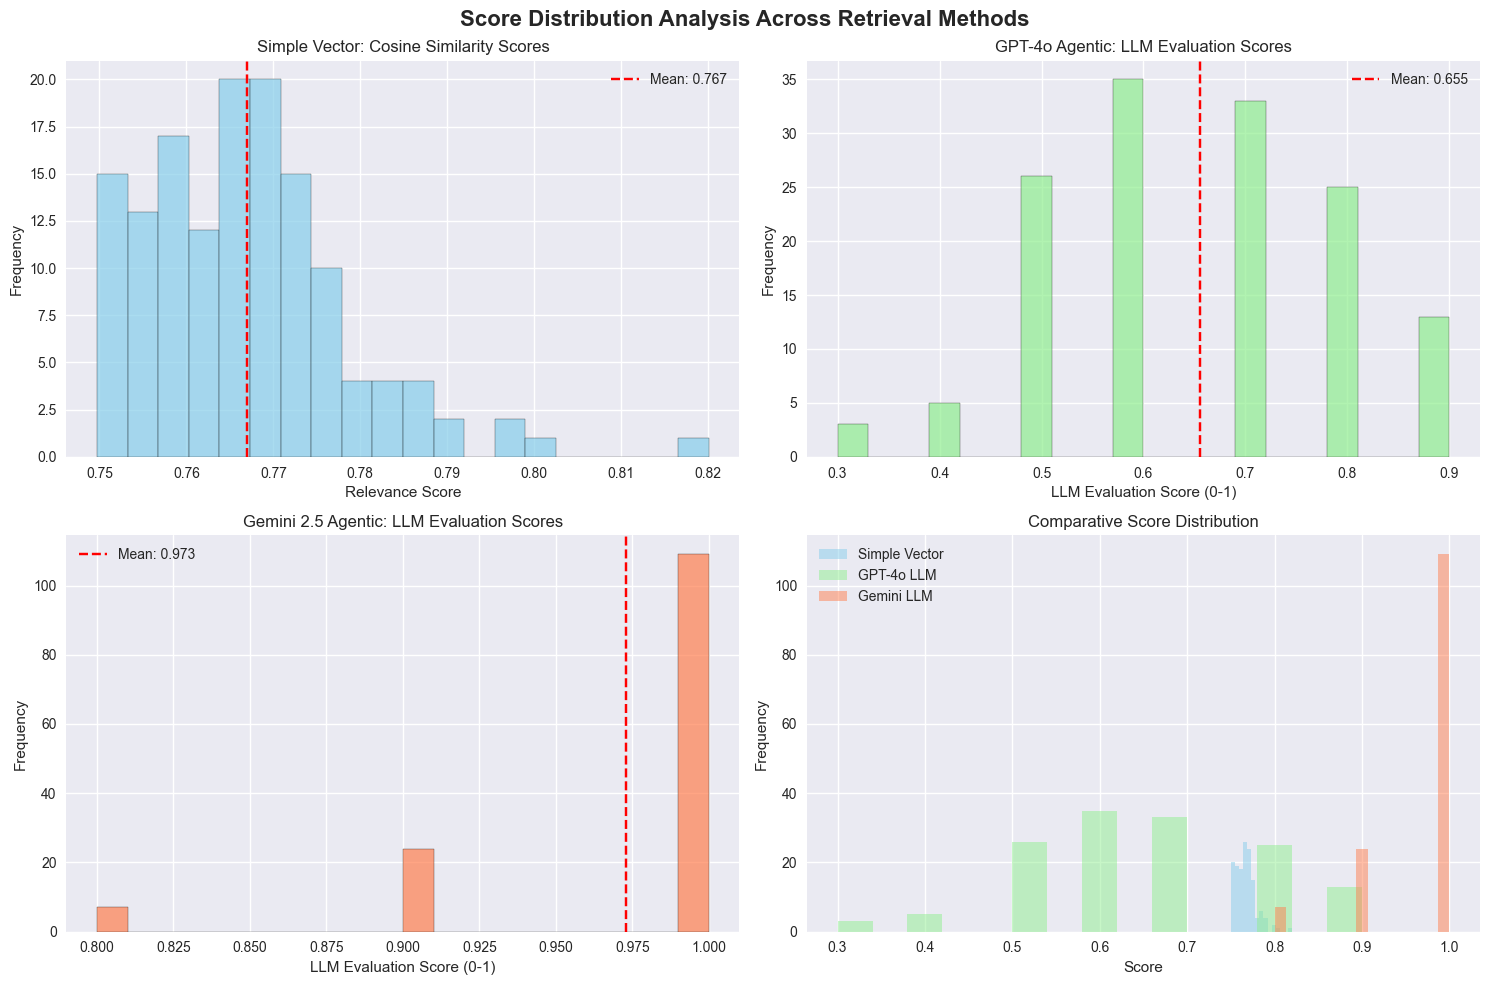

📈 Score Distribution Summary:
Simple Vector - Mean: 0.767, Std: 0.012
GPT-4o Agentic - Mean: 0.655, Std: 0.142
Gemini 2.5 Agentic - Mean: 0.973, Std: 0.055



In [6]:
def analyze_score_distributions():
    """Compare score distributions across methods"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Score Distribution Analysis Across Retrieval Methods', fontsize=16, fontweight='bold')
    
    # Simple method - cosine similarity scores
    axes[0,0].hist(simple_df['relevance_score'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].set_title('Simple Vector: Cosine Similarity Scores')
    axes[0,0].set_xlabel('Relevance Score')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].axvline(simple_df['relevance_score'].mean(), color='red', linestyle='--', 
                     label=f'Mean: {simple_df["relevance_score"].mean():.3f}')
    axes[0,0].legend()
    
    # Agentic methods - LLM evaluation scores
    axes[0,1].hist(gpt_df['llm_evaluation_score'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0,1].set_title('GPT-4o Agentic: LLM Evaluation Scores')
    axes[0,1].set_xlabel('LLM Evaluation Score (0-1)')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].axvline(gpt_df['llm_evaluation_score'].mean(), color='red', linestyle='--',
                     label=f'Mean: {gpt_df["llm_evaluation_score"].mean():.3f}')
    axes[0,1].legend()
    
    axes[1,0].hist(gemini_df['llm_evaluation_score'], bins=20, alpha=0.7, color='coral', edgecolor='black')
    axes[1,0].set_title('Gemini 2.5 Agentic: LLM Evaluation Scores')
    axes[1,0].set_xlabel('LLM Evaluation Score (0-1)')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].axvline(gemini_df['llm_evaluation_score'].mean(), color='red', linestyle='--',
                     label=f'Mean: {gemini_df["llm_evaluation_score"].mean():.3f}')
    axes[1,0].legend()
    
    # Combined comparison of all scoring methods
    axes[1,1].hist(simple_df['relevance_score'], bins=15, alpha=0.5, label='Simple Vector', color='skyblue')
    axes[1,1].hist(gpt_df['llm_evaluation_score'], bins=15, alpha=0.5, label='GPT-4o LLM', color='lightgreen')
    axes[1,1].hist(gemini_df['llm_evaluation_score'], bins=15, alpha=0.5, label='Gemini LLM', color='coral')
    axes[1,1].set_title('Comparative Score Distribution')
    axes[1,1].set_xlabel('Score')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("📈 Score Distribution Summary:")
    print(f"Simple Vector - Mean: {simple_df['relevance_score'].mean():.3f}, Std: {simple_df['relevance_score'].std():.3f}")
    print(f"GPT-4o Agentic - Mean: {gpt_df['llm_evaluation_score'].mean():.3f}, Std: {gpt_df['llm_evaluation_score'].std():.3f}")
    print(f"Gemini 2.5 Agentic - Mean: {gemini_df['llm_evaluation_score'].mean():.3f}, Std: {gemini_df['llm_evaluation_score'].std():.3f}")
    print()

analyze_score_distributions()


🔄 Content Overlap Analysis:
Total unique articles across all methods: 256
Articles found by all three methods: 24
Articles found by Simple + GPT only: 41
Articles found by Simple + Gemini only: 36
Articles found by GPT + Gemini only: 25
Articles unique to Simple Vector: 35
Articles unique to GPT-4o: 42
Articles unique to Gemini: 53

Overlap Percentages:
Simple Vector overlap with others: 74.3%
GPT-4o overlap with others: 68.2%
Gemini overlap with others: 61.6%


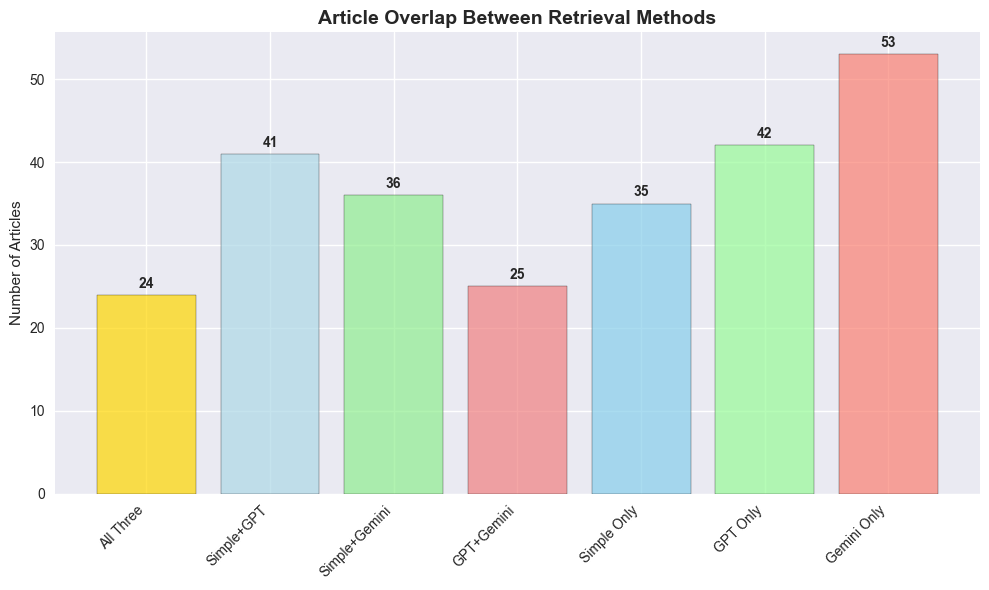

In [9]:
def analyze_content_overlap():
    """Analyze overlap between different retrieval methods"""
    
    # Create sets of URLs for overlap analysis
    simple_urls = set(simple_df['url'].dropna())
    gpt_urls = set(gpt_df['url'].dropna())
    gemini_urls = set(gemini_df['url'].dropna())
    
    # Calculate overlaps
    all_three = simple_urls & gpt_urls & gemini_urls
    simple_gpt = simple_urls & gpt_urls - all_three
    simple_gemini = simple_urls & gemini_urls - all_three
    gpt_gemini = gpt_urls & gemini_urls - all_three
    
    simple_only = simple_urls - gpt_urls - gemini_urls
    gpt_only = gpt_urls - simple_urls - gemini_urls
    gemini_only = gemini_urls - simple_urls - gpt_urls
    
    # Create Venn diagram data
    print("🔄 Content Overlap Analysis:")
    print(f"Total unique articles across all methods: {len(simple_urls | gpt_urls | gemini_urls)}")
    print(f"Articles found by all three methods: {len(all_three)}")
    print(f"Articles found by Simple + GPT only: {len(simple_gpt)}")
    print(f"Articles found by Simple + Gemini only: {len(simple_gemini)}")
    print(f"Articles found by GPT + Gemini only: {len(gpt_gemini)}")
    print(f"Articles unique to Simple Vector: {len(simple_only)}")
    print(f"Articles unique to GPT-4o: {len(gpt_only)}")
    print(f"Articles unique to Gemini: {len(gemini_only)}")
    
    # Calculate overlap percentages
    simple_total = len(simple_urls)
    gpt_total = len(gpt_urls)
    gemini_total = len(gemini_urls)
    
    print(f"\nOverlap Percentages:")
    print(f"Simple Vector overlap with others: {((simple_total - len(simple_only)) / simple_total * 100):.1f}%")
    print(f"GPT-4o overlap with others: {((gpt_total - len(gpt_only)) / gpt_total * 100):.1f}%")
    print(f"Gemini overlap with others: {((gemini_total - len(gemini_only)) / gemini_total * 100):.1f}%")
    
    # Visualize overlap
    fig, ax = plt.subplots(figsize=(10, 6))
    categories = ['All Three', 'Simple+GPT', 'Simple+Gemini', 'GPT+Gemini', 
                 'Simple Only', 'GPT Only', 'Gemini Only']
    counts = [len(all_three), len(simple_gpt), len(simple_gemini), len(gpt_gemini),
             len(simple_only), len(gpt_only), len(gemini_only)]
    
    colors = ['gold', 'lightblue', 'lightgreen', 'lightcoral', 'skyblue', 'palegreen', 'salmon']
    bars = ax.bar(categories, counts, color=colors, edgecolor='black', alpha=0.7)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
    ax.set_title('Article Overlap Between Retrieval Methods', fontsize=14, fontweight='bold')
    ax.set_ylabel('Number of Articles')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print()

analyze_content_overlap()


🎯 High-Quality Retrieval Analysis:
Simple Vector (top 20%): 28 chunks (threshold: 0.774)
GPT-4o Agentic (≥0.7): 38 chunks
Gemini 2.5 Agentic (≥0.7): 133 chunks


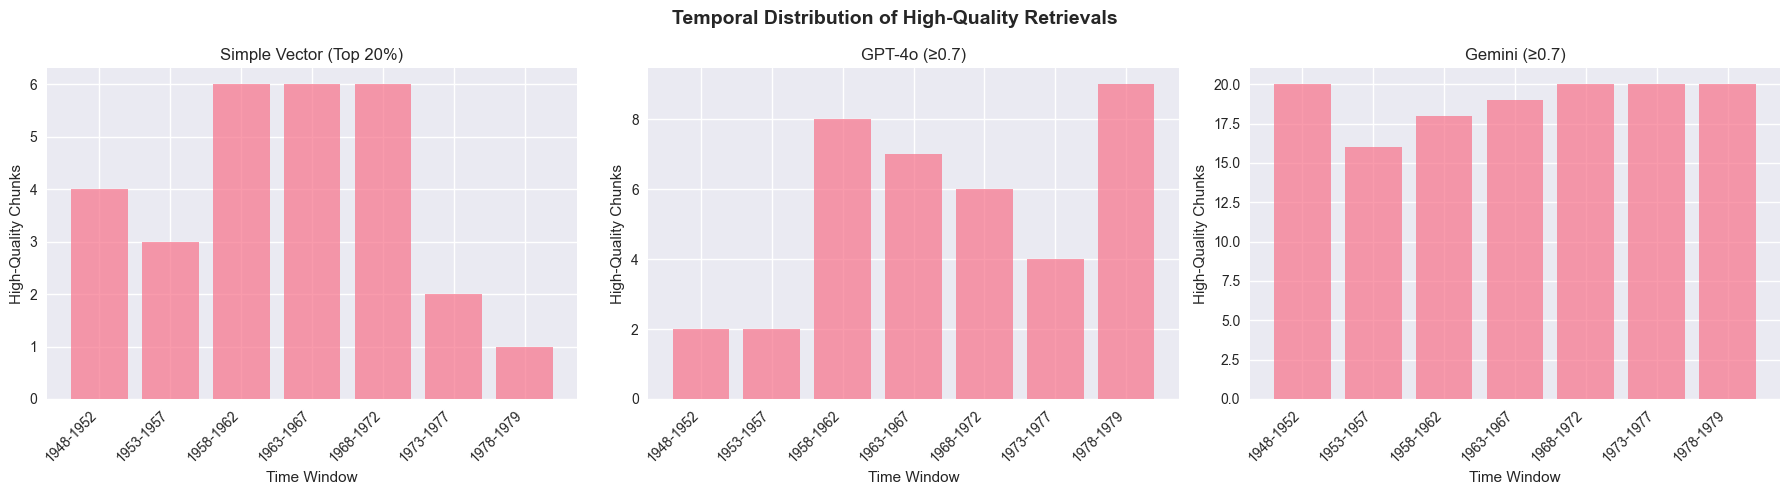


📋 Examples of High-Quality Retrievals:

GPT-4o Top Retrieval:
Score: 0.90 | 1960-01-05 | »STEHEN SIE AUF, VAN DER LUBBE!«
Evaluation: Score: 9.0/10 - Der Text bietet eine detaillierte Analyse der politischen und juristischen Konsequenzen des Reichstagsbrands, was für die Aufarbeitung der NS-Verbrechen und die gesellschaftliche Ausei...

Gemini Top Retrieval:
Score: 1.00 | 1951-12-25 | Nach Führerprinzip
Evaluation: Score: 10.0/10 - Automatisch extrahiert...



In [12]:
def analyze_high_quality_retrievals():
    """Focus on highest-scoring retrievals to assess quality"""
    
    # Define high-quality thresholds
    simple_threshold = simple_df['relevance_score'].quantile(0.8)  # Top 20%
    gpt_threshold = 0.8 
    gemini_threshold = 0.9 
    
    # Filter high-quality results
    simple_high = simple_df[simple_df['relevance_score'] >= simple_threshold]
    gpt_high = gpt_df[gpt_df['llm_evaluation_score'] >= gpt_threshold]
    gemini_high = gemini_df[gemini_df['llm_evaluation_score'] >= gemini_threshold]
    
    print("🎯 High-Quality Retrieval Analysis:")
    print(f"Simple Vector (top 20%): {len(simple_high)} chunks (threshold: {simple_threshold:.3f})")
    print(f"GPT-4o Agentic (≥0.7): {len(gpt_high)} chunks")
    print(f"Gemini 2.5 Agentic (≥0.7): {len(gemini_high)} chunks")
    
    # Analyze temporal distribution of high-quality results
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Temporal Distribution of High-Quality Retrievals', fontsize=14, fontweight='bold')
    
    methods = [simple_high, gpt_high, gemini_high]
    titles = ['Simple Vector (Top 20%)', 'GPT-4o (≥0.7)', 'Gemini (≥0.7)']
    
    for i, (data, title) in enumerate(zip(methods, titles)):
        time_counts = data['time_window'].value_counts().sort_index()
        axes[i].bar(range(len(time_counts)), time_counts.values, alpha=0.7)
        axes[i].set_title(title)
        axes[i].set_xlabel('Time Window')
        axes[i].set_ylabel('High-Quality Chunks')
        axes[i].set_xticks(range(len(time_counts)))
        axes[i].set_xticklabels(time_counts.index, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Show some examples of high-quality retrievals
    print("\n📋 Examples of High-Quality Retrievals:")
    print("\nGPT-4o Top Retrieval:")
    gpt_top = gpt_df.loc[gpt_df['llm_evaluation_score'].idxmax()]
    print(f"Score: {gpt_top['llm_evaluation_score']:.2f} | {gpt_top['datum']} | {gpt_top['titel']}")
    print(f"Evaluation: {gpt_top['evaluation_text'][:200]}...")
    
    print("\nGemini Top Retrieval:")
    gemini_top = gemini_df.loc[gemini_df['llm_evaluation_score'].idxmax()]
    print(f"Score: {gemini_top['llm_evaluation_score']:.2f} | {gemini_top['datum']} | {gemini_top['titel']}")
    print(f"Evaluation: {gemini_top['evaluation_text'][:200]}...")
    print()

analyze_high_quality_retrievals()


In [14]:
## QUALITATIVE CONTENT ANALYSIS: HIGHEST AND LOWEST RATED CHUNKS

def examine_extreme_rated_content():
    """
    Examine the actual content of highest and lowest rated chunks
    to assess whether scoring aligns with historical relevance
    """
    
    print("📋 QUALITATIVE CONTENT ANALYSIS: EXTREME RATINGS")
    print("="*80)
    print("Examining actual content to evaluate scoring validity from historical perspective")
    print()
    
    def print_chunk_details(chunk, method_name, rating_type, score_column):
        """Helper function to format chunk display"""
        print(f"🔍 {method_name} - {rating_type}")
        print(f"Score: {chunk[score_column]:.3f}")
        print(f"Title: {chunk['titel']}")
        print(f"Date: {chunk['datum']} | Time Window: {chunk['time_window']}")
        
        # Show evaluation text for agentic methods
        if 'evaluation_text' in chunk and pd.notna(chunk['evaluation_text']):
            print(f"LLM Evaluation: {chunk['evaluation_text']}")
        
        print(f"Content Length: {chunk['content_length']} characters")
        print("Content:")
        print("-" * 40)
        
        # Show full content if short, otherwise preview + indication
        if chunk['content_length'] <= 500:
            print(chunk['full_content'])
        else:
            print(chunk['content_preview'])
            print(f"\n[... content continues for {chunk['content_length'] - len(chunk['content_preview'])} more characters]")
        
        print("="*80)
        print()
    
    # === SIMPLE VECTOR METHOD ===
    print("🎯 SIMPLE VECTOR SIMILARITY METHOD")
    print()
    
    # Highest rated
    simple_highest = simple_df.loc[simple_df['relevance_score'].idxmax()]
    print_chunk_details(simple_highest, "Simple Vector", "HIGHEST RATED", 'relevance_score')
    
    # Lowest rated  
    simple_lowest = simple_df.loc[simple_df['relevance_score'].idxmin()]
    print_chunk_details(simple_lowest, "Simple Vector", "LOWEST RATED", 'relevance_score')
    
    # === GPT-4O AGENTIC METHOD ===
    print("🤖 GPT-4O AGENTIC METHOD")
    print()
    
    # Highest rated
    gpt_highest = gpt_df.loc[gpt_df['llm_evaluation_score'].idxmax()]
    print_chunk_details(gpt_highest, "GPT-4o Agentic", "HIGHEST RATED", 'llm_evaluation_score')
    
    # Lowest rated
    gpt_lowest = gpt_df.loc[gpt_df['llm_evaluation_score'].idxmin()]
    print_chunk_details(gpt_lowest, "GPT-4o Agentic", "LOWEST RATED", 'llm_evaluation_score')
    
    # === GEMINI 2.5 AGENTIC METHOD ===
    print("🔮 GEMINI 2.5 AGENTIC METHOD")
    print()
    
    # Highest rated
    gemini_highest = gemini_df.loc[gemini_df['llm_evaluation_score'].idxmax()]
    print_chunk_details(gemini_highest, "Gemini 2.5 Agentic", "HIGHEST RATED", 'llm_evaluation_score')
    
    # Lowest rated
    gemini_lowest = gemini_df.loc[gemini_df['llm_evaluation_score'].idxmin()]
    print_chunk_details(gemini_lowest, "Gemini 2.5 Agentic", "LOWEST RATED", 'llm_evaluation_score')
    
    # === COMPARATIVE ANALYSIS ===
    print("🔄 COMPARATIVE INSIGHTS")
    print("-" * 40)

    
    # Show some stats about the extremes
    print("📊 Score Range Summary:")
    print(f"Simple Vector: {simple_df['relevance_score'].min():.4f} → {simple_df['relevance_score'].max():.4f}")
    print(f"GPT-4o Agentic: {gpt_df['llm_evaluation_score'].min():.4f} → {gpt_df['llm_evaluation_score'].max():.4f}")
    print(f"Gemini 2.5 Agentic: {gemini_df['llm_evaluation_score'].min():.4f} → {gemini_df['llm_evaluation_score'].max():.4f}")

examine_extreme_rated_content()

📋 QUALITATIVE CONTENT ANALYSIS: EXTREME RATINGS
Examining actual content to evaluate scoring validity from historical perspective

🎯 SIMPLE VECTOR SIMILARITY METHOD

🔍 Simple Vector - HIGHEST RATED
Score: 0.820
Title: Hans-Helmuth Knütter: »ldeologien des Rechtsradikalismus im Nachkriegsdeutschland«.
Date: 1961-12-19 | Time Window: 1958-1962
Content Length: 596 characters
Content:
----------------------------------------
In einer »Studie über die Nachwirkungen des Nationalsozialismus« durchleuchtete der Autor die rechtsradikale Publizistik auf ihr Urteil über Hitler, die Kriegsschuldfrage, die deutsche Widerstandsbewe...

[... content continues for 393 more characters]

🔍 Simple Vector - LOWEST RATED
Score: 0.750
Title: »Ein Angreifer, zu nackter Grausamkeit fähig«
Date: 1978-01-08 | Time Window: 1978-1979
Content Length: 551 characters
Content:
----------------------------------------
Die Männer und Frauen, die Hitler aus diesen Reihen rekrutierte, ersannen und begingen Greueltaten de

🔍 VECTOR SIMILARITY COMPARISON ACROSS RETRIEVAL METHODS
Research Question: Does LLM-based filtering select chunks with higher cosine similarity?
If yes → LLMs may just be sophisticated similarity rankers
If no → LLMs apply genuinely different historical evaluation criteria

📊 Vector Similarity Score Statistics:
               Method  Count    Mean     Std     Min     Max     Q75     Q25
0       Simple Vector    140  0.7669  0.0115  0.7497  0.8201  0.7728  0.7579
1      GPT-4o Agentic    140  0.7587  0.0141  0.7373  0.8201  0.7656  0.7488
2  Gemini 2.5 Agentic    140  0.7563  0.0118  0.7358  0.7891  0.7640  0.7478



C:\Users\noahb\AppData\Local\Temp\ipykernel_29812\600841732.py:58: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0,1].boxplot(box_data, labels=box_labels, patch_artist=True, notch=True)


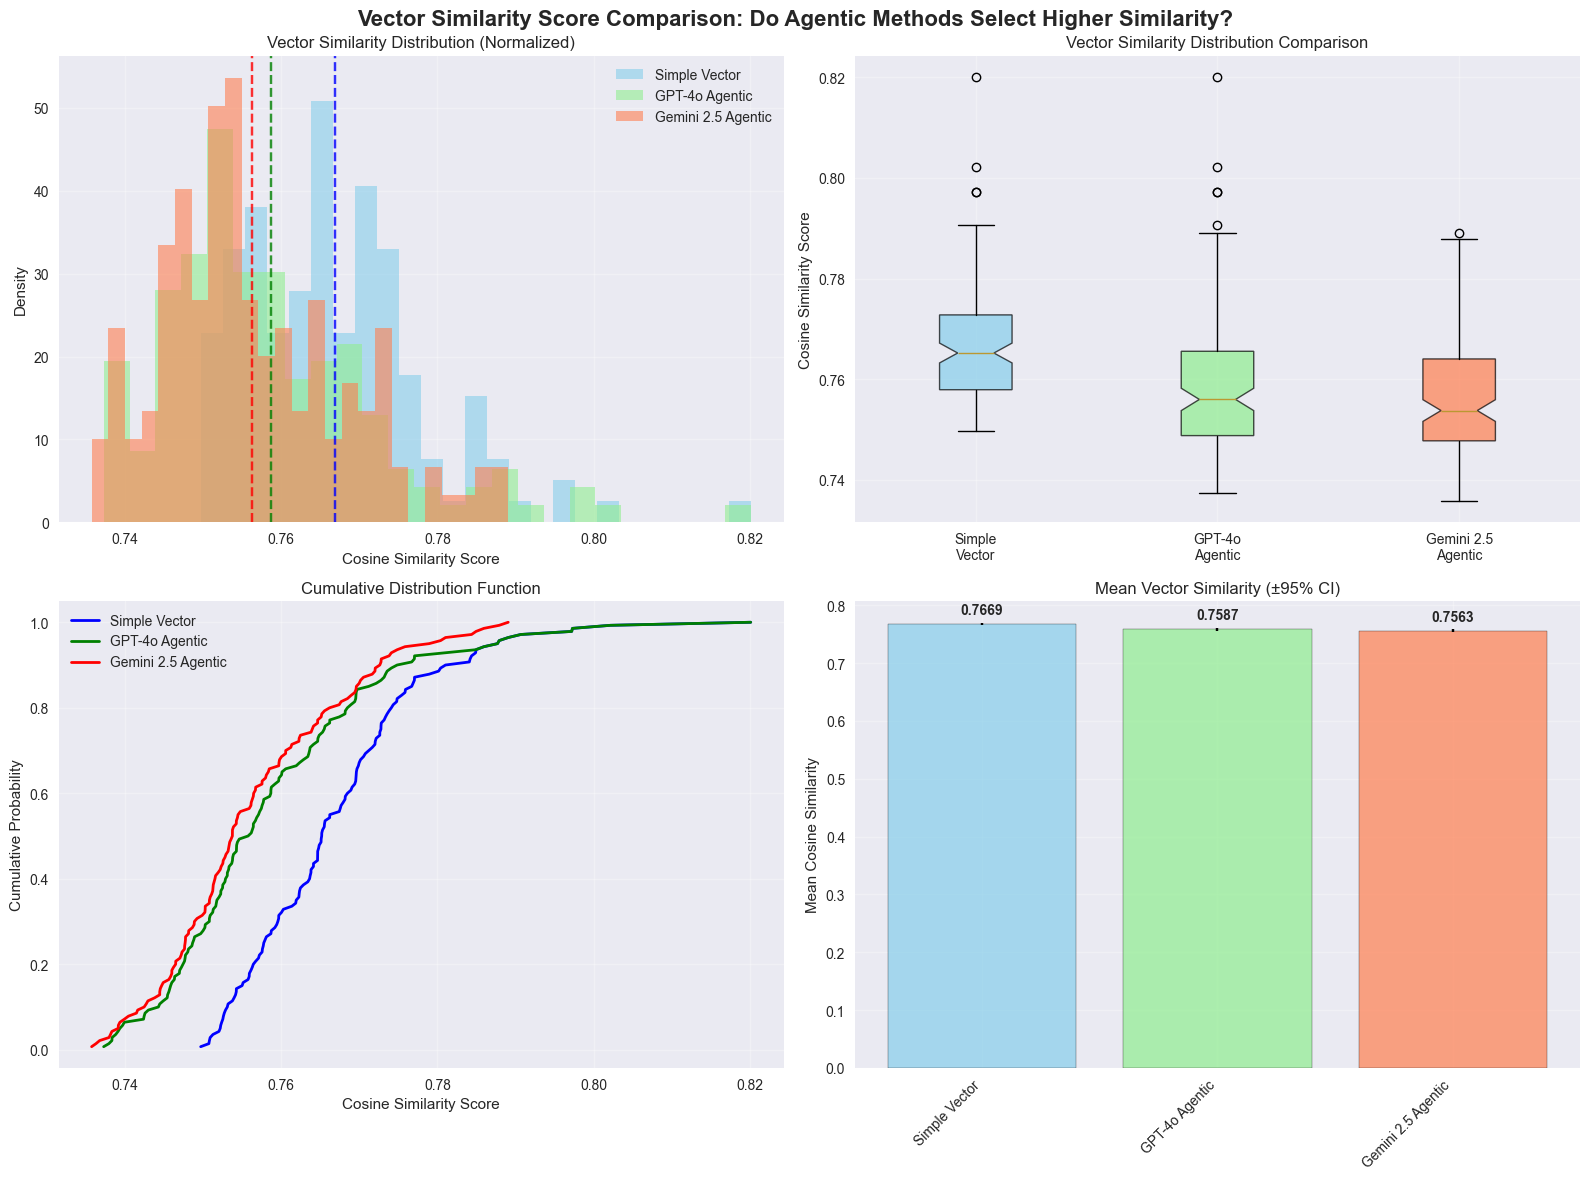

🧮 Statistical Significance Tests (Welch's t-test):
Simple vs GPT-4o: t=5.3498, p=0.000000 ***
Simple vs Gemini: t=7.6148, p=0.000000 ***
GPT-4o vs Gemini: t=1.5286, p=0.127532 ns

🎯 INTERPRETATION:
✅ Agentic methods select chunks with LOWER average cosine similarity
   → LLMs apply different criteria beyond semantic similarity
   → Evidence for genuine historical evaluation capability

📈 Effect Sizes (Cohen's d):
GPT vs Simple: d=-0.6394 (Medium)
Gemini vs Simple: d=-0.9101 (Large)
GPT vs Gemini: d=0.1827 (Negligible)



In [13]:
def compare_vector_similarity_across_methods():
    """
    Critical analysis: Do agentic methods actually select chunks with higher cosine similarity?
    This reveals whether LLM evaluation adds genuine insight beyond semantic similarity.
    """
    
    print("🔍 VECTOR SIMILARITY COMPARISON ACROSS RETRIEVAL METHODS")
    print("="*70)
    print("Research Question: Does LLM-based filtering select chunks with higher cosine similarity?")
    print("If yes → LLMs may just be sophisticated similarity rankers")
    print("If no → LLMs apply genuinely different historical evaluation criteria")
    print()
    
    # Extract vector similarity scores for each method
    simple_vector_scores = simple_df['relevance_score'].values
    gpt_vector_scores = gpt_df['vector_similarity_score'].values  
    gemini_vector_scores = gemini_df['vector_similarity_score'].values
    
    # Calculate summary statistics
    stats_data = {
        'Method': ['Simple Vector', 'GPT-4o Agentic', 'Gemini 2.5 Agentic'],
        'Count': [len(simple_vector_scores), len(gpt_vector_scores), len(gemini_vector_scores)],
        'Mean': [np.mean(simple_vector_scores), np.mean(gpt_vector_scores), np.mean(gemini_vector_scores)],
        'Std': [np.std(simple_vector_scores), np.std(gpt_vector_scores), np.std(gemini_vector_scores)],
        'Min': [np.min(simple_vector_scores), np.min(gpt_vector_scores), np.min(gemini_vector_scores)],
        'Max': [np.max(simple_vector_scores), np.max(gpt_vector_scores), np.max(gemini_vector_scores)],
        'Q75': [np.percentile(simple_vector_scores, 75), np.percentile(gpt_vector_scores, 75), np.percentile(gemini_vector_scores, 75)],
        'Q25': [np.percentile(simple_vector_scores, 25), np.percentile(gpt_vector_scores, 25), np.percentile(gemini_vector_scores, 25)]
    }
    
    stats_df = pd.DataFrame(stats_data)
    print("📊 Vector Similarity Score Statistics:")
    print(stats_df.round(4))
    print()
    
    # Visual comparison
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Vector Similarity Score Comparison: Do Agentic Methods Select Higher Similarity?', 
                 fontsize=16, fontweight='bold')
    
    # 1. Side-by-side histograms
    axes[0,0].hist(simple_vector_scores, bins=25, alpha=0.6, label='Simple Vector', color='skyblue', density=True)
    axes[0,0].hist(gpt_vector_scores, bins=25, alpha=0.6, label='GPT-4o Agentic', color='lightgreen', density=True)
    axes[0,0].hist(gemini_vector_scores, bins=25, alpha=0.6, label='Gemini 2.5 Agentic', color='coral', density=True)
    axes[0,0].axvline(np.mean(simple_vector_scores), color='blue', linestyle='--', alpha=0.8)
    axes[0,0].axvline(np.mean(gpt_vector_scores), color='green', linestyle='--', alpha=0.8)
    axes[0,0].axvline(np.mean(gemini_vector_scores), color='red', linestyle='--', alpha=0.8)
    axes[0,0].set_title('Vector Similarity Distribution (Normalized)')
    axes[0,0].set_xlabel('Cosine Similarity Score')
    axes[0,0].set_ylabel('Density')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Box plot comparison
    box_data = [simple_vector_scores, gpt_vector_scores, gemini_vector_scores]
    box_labels = ['Simple\nVector', 'GPT-4o\nAgentic', 'Gemini 2.5\nAgentic']
    
    bp = axes[0,1].boxplot(box_data, labels=box_labels, patch_artist=True, notch=True)
    colors = ['skyblue', 'lightgreen', 'coral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[0,1].set_title('Vector Similarity Distribution Comparison')
    axes[0,1].set_ylabel('Cosine Similarity Score')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Cumulative distribution comparison
    x_simple = np.sort(simple_vector_scores)
    y_simple = np.arange(1, len(x_simple) + 1) / len(x_simple)
    
    x_gpt = np.sort(gpt_vector_scores)
    y_gpt = np.arange(1, len(x_gpt) + 1) / len(x_gpt)
    
    x_gemini = np.sort(gemini_vector_scores)
    y_gemini = np.arange(1, len(x_gemini) + 1) / len(x_gemini)
    
    axes[1,0].plot(x_simple, y_simple, label='Simple Vector', color='blue', linewidth=2)
    axes[1,0].plot(x_gpt, y_gpt, label='GPT-4o Agentic', color='green', linewidth=2)
    axes[1,0].plot(x_gemini, y_gemini, label='Gemini 2.5 Agentic', color='red', linewidth=2)
    axes[1,0].set_title('Cumulative Distribution Function')
    axes[1,0].set_xlabel('Cosine Similarity Score')
    axes[1,0].set_ylabel('Cumulative Probability')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. Mean comparison with confidence intervals
    methods = ['Simple Vector', 'GPT-4o Agentic', 'Gemini 2.5 Agentic']
    means = [np.mean(simple_vector_scores), np.mean(gpt_vector_scores), np.mean(gemini_vector_scores)]
    stds = [np.std(simple_vector_scores), np.std(gpt_vector_scores), np.std(gemini_vector_scores)]
    ns = [len(simple_vector_scores), len(gpt_vector_scores), len(gemini_vector_scores)]
    
    # Calculate 95% confidence intervals
    confidence_intervals = [1.96 * std / np.sqrt(n) for std, n in zip(stds, ns)]
    
    x_pos = range(len(methods))
    bars = axes[1,1].bar(x_pos, means, yerr=confidence_intervals, 
                        color=['skyblue', 'lightgreen', 'coral'], 
                        alpha=0.7, capsize=10, edgecolor='black')
    
    # Add value labels on bars
    for i, (bar, mean, ci) in enumerate(zip(bars, means, confidence_intervals)):
        axes[1,1].text(bar.get_x() + bar.get_width()/2., mean + ci + 0.01,
                      f'{mean:.4f}', ha='center', va='bottom', fontweight='bold')
    
    axes[1,1].set_title('Mean Vector Similarity (±95% CI)')
    axes[1,1].set_ylabel('Mean Cosine Similarity')
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(methods, rotation=45, ha='right')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Statistical significance testing
    from scipy import stats
    
    print("🧮 Statistical Significance Tests (Welch's t-test):")
    
    # Simple vs GPT
    t_stat_sg, p_val_sg = stats.ttest_ind(simple_vector_scores, gpt_vector_scores, equal_var=False)
    print(f"Simple vs GPT-4o: t={t_stat_sg:.4f}, p={p_val_sg:.6f} {'***' if p_val_sg < 0.001 else '**' if p_val_sg < 0.01 else '*' if p_val_sg < 0.05 else 'ns'}")
    
    # Simple vs Gemini  
    t_stat_sgm, p_val_sgm = stats.ttest_ind(simple_vector_scores, gemini_vector_scores, equal_var=False)
    print(f"Simple vs Gemini: t={t_stat_sgm:.4f}, p={p_val_sgm:.6f} {'***' if p_val_sgm < 0.001 else '**' if p_val_sgm < 0.01 else '*' if p_val_sgm < 0.05 else 'ns'}")
    
    # GPT vs Gemini
    t_stat_gg, p_val_gg = stats.ttest_ind(gpt_vector_scores, gemini_vector_scores, equal_var=False)
    print(f"GPT-4o vs Gemini: t={t_stat_gg:.4f}, p={p_val_gg:.6f} {'***' if p_val_gg < 0.001 else '**' if p_val_gg < 0.01 else '*' if p_val_gg < 0.05 else 'ns'}")
    
    print("\n🎯 INTERPRETATION:")
    
    # Compare means
    simple_mean = np.mean(simple_vector_scores)
    gpt_mean = np.mean(gpt_vector_scores)
    gemini_mean = np.mean(gemini_vector_scores)
    
    if gpt_mean > simple_mean and gemini_mean > simple_mean:
        print("✅ Both agentic methods select chunks with HIGHER average cosine similarity")
        print("   → LLMs may be acting as sophisticated similarity filters")
        print("   → Question: Are they just picking the 'most similar' chunks?")
    elif gpt_mean < simple_mean or gemini_mean < simple_mean:
        print("✅ Agentic methods select chunks with LOWER average cosine similarity")
        print("   → LLMs apply different criteria beyond semantic similarity")
        print("   → Evidence for genuine historical evaluation capability")
    else:
        print("➡️ No significant difference in cosine similarity")
        print("   → LLMs maintain similar similarity threshold as vector search")
    
    print(f"\n📈 Effect Sizes (Cohen's d):")
    
    # Calculate Cohen's d
    def cohens_d(x, y):
        pooled_std = np.sqrt(((len(x) - 1) * np.var(x, ddof=1) + (len(y) - 1) * np.var(y, ddof=1)) / (len(x) + len(y) - 2))
        return (np.mean(x) - np.mean(y)) / pooled_std
    
    d_sg = cohens_d(gpt_vector_scores, simple_vector_scores)
    d_sgm = cohens_d(gemini_vector_scores, simple_vector_scores)
    d_gg = cohens_d(gpt_vector_scores, gemini_vector_scores)
    
    print(f"GPT vs Simple: d={d_sg:.4f} {'(Large)' if abs(d_sg) > 0.8 else '(Medium)' if abs(d_sg) > 0.5 else '(Small)' if abs(d_sg) > 0.2 else '(Negligible)'}")
    print(f"Gemini vs Simple: d={d_sgm:.4f} {'(Large)' if abs(d_sgm) > 0.8 else '(Medium)' if abs(d_sgm) > 0.5 else '(Small)' if abs(d_sgm) > 0.2 else '(Negligible)'}")
    print(f"GPT vs Gemini: d={d_gg:.4f} {'(Large)' if abs(d_gg) > 0.8 else '(Medium)' if abs(d_gg) > 0.5 else '(Small)' if abs(d_gg) > 0.2 else '(Negligible)'}")
    print()

compare_vector_similarity_across_methods()


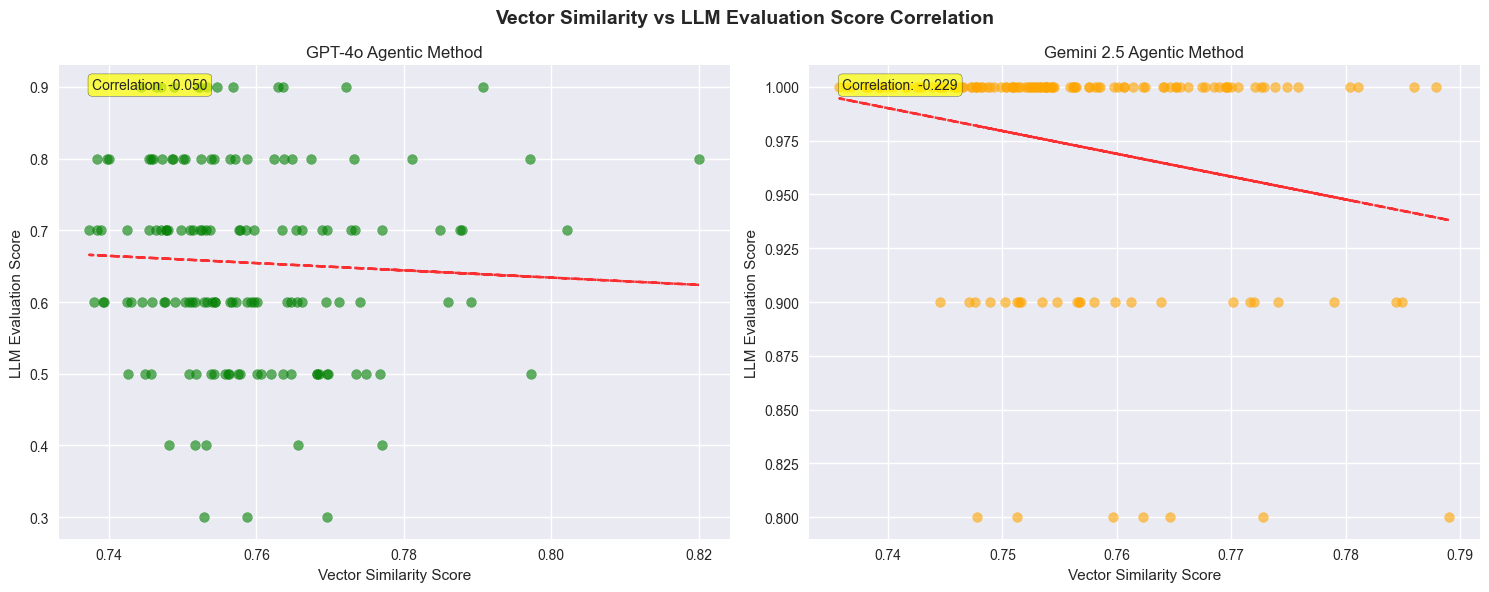

🔗 Vector-LLM Score Correlation Analysis:
GPT-4o: -0.050 (Weak)
Gemini 2.5: -0.229 (Weak)
Lower correlation suggests LLM evaluation adds different perspective than vector similarity



In [7]:
def analyze_vector_llm_correlation():
    """Examine relationship between vector similarity and LLM evaluation scores"""
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Vector Similarity vs LLM Evaluation Score Correlation', fontsize=14, fontweight='bold')
    
    # GPT-4o correlation
    axes[0].scatter(gpt_df['vector_similarity_score'], gpt_df['llm_evaluation_score'], 
                   alpha=0.6, color='green', s=50)
    axes[0].set_xlabel('Vector Similarity Score')
    axes[0].set_ylabel('LLM Evaluation Score')
    axes[0].set_title('GPT-4o Agentic Method')
    
    # Calculate and display correlation
    gpt_corr = np.corrcoef(gpt_df['vector_similarity_score'], gpt_df['llm_evaluation_score'])[0,1]
    axes[0].text(0.05, 0.95, f'Correlation: {gpt_corr:.3f}', transform=axes[0].transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    # Add trend line
    z = np.polyfit(gpt_df['vector_similarity_score'], gpt_df['llm_evaluation_score'], 1)
    p = np.poly1d(z)
    axes[0].plot(gpt_df['vector_similarity_score'], p(gpt_df['vector_similarity_score']), "r--", alpha=0.8)
    
    # Gemini correlation
    axes[1].scatter(gemini_df['vector_similarity_score'], gemini_df['llm_evaluation_score'], 
                   alpha=0.6, color='orange', s=50)
    axes[1].set_xlabel('Vector Similarity Score')
    axes[1].set_ylabel('LLM Evaluation Score')
    axes[1].set_title('Gemini 2.5 Agentic Method')
    
    gemini_corr = np.corrcoef(gemini_df['vector_similarity_score'], gemini_df['llm_evaluation_score'])[0,1]
    axes[1].text(0.05, 0.95, f'Correlation: {gemini_corr:.3f}', transform=axes[1].transAxes,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    z = np.polyfit(gemini_df['vector_similarity_score'], gemini_df['llm_evaluation_score'], 1)
    p = np.poly1d(z)
    axes[1].plot(gemini_df['vector_similarity_score'], p(gemini_df['vector_similarity_score']), "r--", alpha=0.8)
    
    plt.tight_layout()
    plt.show()
    
    print("🔗 Vector-LLM Score Correlation Analysis:")
    print(f"GPT-4o: {gpt_corr:.3f} {'(Strong)' if abs(gpt_corr) > 0.7 else '(Moderate)' if abs(gpt_corr) > 0.3 else '(Weak)'}")
    print(f"Gemini 2.5: {gemini_corr:.3f} {'(Strong)' if abs(gemini_corr) > 0.7 else '(Moderate)' if abs(gemini_corr) > 0.3 else '(Weak)'}")
    print("Lower correlation suggests LLM evaluation adds different perspective than vector similarity")
    print()

analyze_vector_llm_correlation()


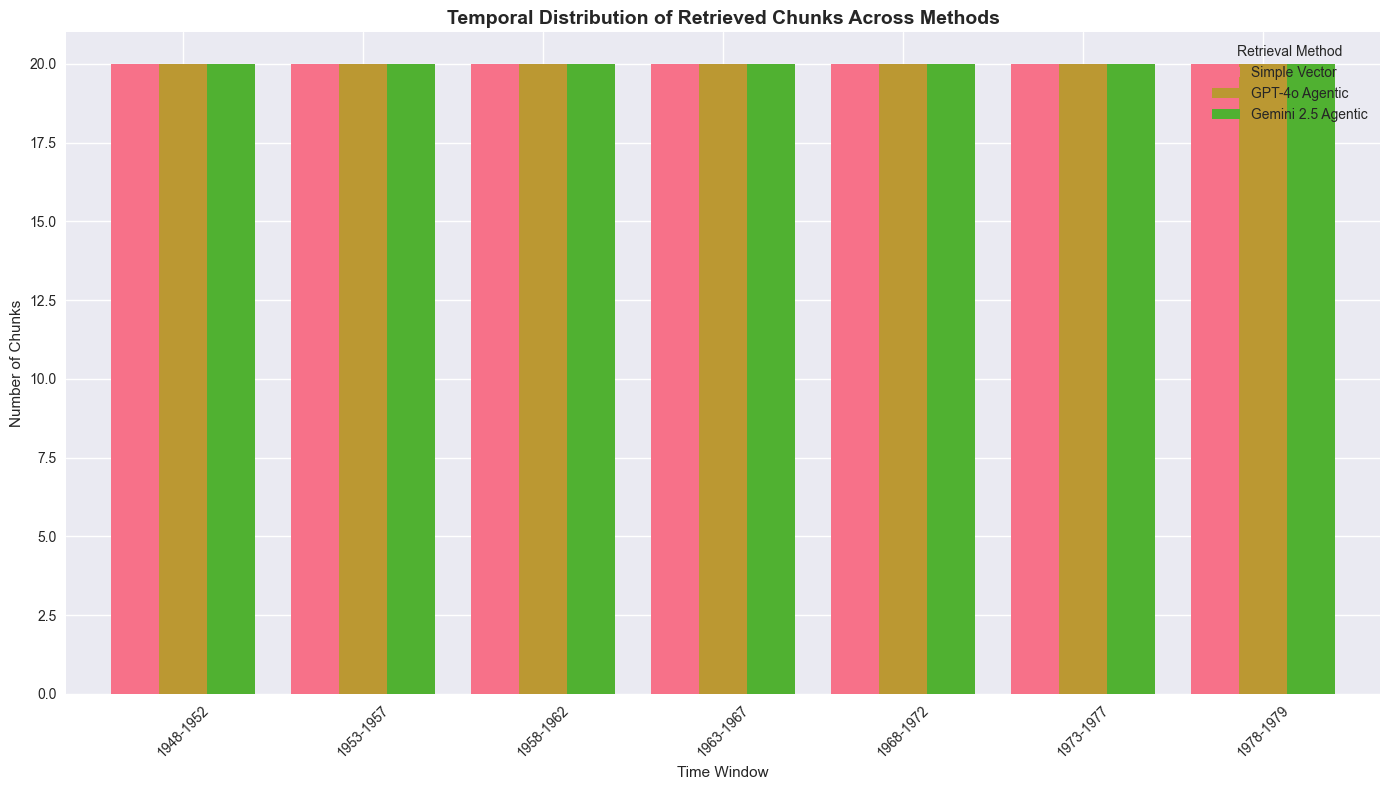

📅 Temporal Distribution Analysis:
Expected: ~20 chunks per time window for each method

Actual distribution:

Simple Vector:
  1948-1952: 20 chunks
  1953-1957: 20 chunks
  1958-1962: 20 chunks
  1963-1967: 20 chunks
  1968-1972: 20 chunks
  1973-1977: 20 chunks
  1978-1979: 20 chunks

GPT-4o Agentic:
  1948-1952: 20 chunks
  1953-1957: 20 chunks
  1958-1962: 20 chunks
  1963-1967: 20 chunks
  1968-1972: 20 chunks
  1973-1977: 20 chunks
  1978-1979: 20 chunks

Gemini 2.5 Agentic:
  1948-1952: 20 chunks
  1953-1957: 20 chunks
  1958-1962: 20 chunks
  1963-1967: 20 chunks
  1968-1972: 20 chunks
  1973-1977: 20 chunks
  1978-1979: 20 chunks



In [ ]:
# # Maybe for a non-temporally distributed dataset, we could analyze the temporal distribution of chunks retrieved by each method.

# def analyze_temporal_distribution():
#     """Analyze how chunks are distributed across time periods"""
    
#     # Create temporal distribution comparison
#     temporal_counts = {}
#     temporal_counts['Simple Vector'] = simple_df['time_window'].value_counts().sort_index()
#     temporal_counts['GPT-4o Agentic'] = gpt_df['time_window'].value_counts().sort_index()
#     temporal_counts['Gemini 2.5 Agentic'] = gemini_df['time_window'].value_counts().sort_index()
    
#     # Convert to DataFrame for easier plotting
#     temporal_df = pd.DataFrame(temporal_counts).fillna(0)
    
#     # Plot temporal distribution
#     fig, ax = plt.subplots(figsize=(14, 8))
#     temporal_df.plot(kind='bar', ax=ax, width=0.8)
#     ax.set_title('Temporal Distribution of Retrieved Chunks Across Methods', fontsize=14, fontweight='bold')
#     ax.set_xlabel('Time Window')
#     ax.set_ylabel('Number of Chunks')
#     ax.legend(title='Retrieval Method')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()
    
#     print("📅 Temporal Distribution Analysis:")
#     print("Expected: ~20 chunks per time window for each method")
#     print("\nActual distribution:")
#     for method in temporal_counts:
#         print(f"\n{method}:")
#         for window, count in temporal_counts[method].items():
#             print(f"  {window}: {count} chunks")
#     print()

# analyze_temporal_distribution()
